## Predicting Employee Attrition    

In recent years, attention has increasingly been paid to human resources (HR), since worker quality and skills represent a growth factor and a real competitive advantage for companies. After proving its mettle in sales and marketing, artificial intelligence is also becoming central to employee-related decisions within HR management. Organizational growth largely depends on staff retention. Losing employees frequently impacts the morale of the organization and hiring new employees is more expensive than retaining existing ones. 

You are working as a data scientist with HR Department of a large insurance company focused on sales team attrition. Insurance sales teams help insurance companies generate new business by contacting potential customers and selling one or more types of insurance. The department generally sees high attrition and thus staffing becomes a crucial aspect. 

To aid staffing, you are provided with the monthly information for a segment of employees for 2016 and 2017 and tasked to predict whether a current employee will be leaving the organization in the upcoming two quarters (01 Jan 2018 - 01 July 2018) or not, given:


1. Demographics of the employee (city, age, gender etc.)
2. Tenure information (joining date, Last Date)
3. Historical data regarding the performance of the employee (Quarterly rating, Monthly business acquired, designation, salary)

## Data Dictionary

### Train Data

* `Variable | Definition`
* `MMMM-YY | Reporting Date (Monthly)`
* `Emp_ID | Unique id for employees`
* `Age | Age of the employee`
* `Gender | Gender of the employee`
* `City | City Code of the employee`
* `Education_Level | Education level : Bachelor, Master or College`
* `Salary | Salary of the employee`
* `Dateofjoining | Joining date for the employee`
* `LastWorkingDate | Last date of working for the employee`
* `Joining Designation | Designation of the employee at the time of joining`
* `Designation | Designation of the employee at the time of reporting`
* `Total_Business_Value | The total business value acquired by the employee in a month (negative business indicates 
cancellation/refund of sold insurance policies)`
* `Quarterly Rating | Quarterly rating of the employee: 1,2,3,4 (higher is better)`


### Test Data

* `Variable | Definition`
* `Emp_ID | Unique Id for the employee`

Sample Submission

This file contains the exact submission format for the predictions. Please submit the CSV file only.

* `Variable | Definition`
* `Emp_ID | Employee ID`
* `Target | 0: if the employee does not leave the organization, 1: if the employee leaves the organization`


### Evaluation Metric

The evaluation metric for this competition is macro f1_score

In [2]:
'''Importing Libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv(r"D:\Analytcs Vidhya\Jobathon\Nov 2021\train.csv")
test = pd.read_csv(r"D:\Analytcs Vidhya\Jobathon\Nov 2021\test.csv")
sample = pd.read_csv(r"D:\Analytcs Vidhya\Jobathon\Nov 2021\sample_submission_znWiLZ4.csv")

In [4]:
# Looking at the unique employee ID's in the dataset.
train.Emp_ID.nunique()

2381

In [5]:
print(f"Total number of features in the data are \033[1m{train.shape[1]}\033[0m")

Total number of features in the data are 13


In [6]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [8]:
print(f"The total number of unique employee id in the test data are \033[1m{test.Emp_ID.nunique()}\033[0m")

The total number of unique employee id in the test data are 741


In [9]:
# Looking at the null values in the dataset
train.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [10]:
# Making a new dataset after dropping the duplicate values
new_train = train.drop_duplicates(subset='Emp_ID', keep='last', ignore_index=True)
new_train

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
1,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
2,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1
3,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1
4,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaN,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaN,2,3,505480,4
2377,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1
2378,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1
2379,2016-06-01,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,0,1


In [11]:
# Merging test dataframe to create testing dataset
test = pd.merge(test, new_train, how='left',on='Emp_ID')
test

,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,394,2017-12-01,34,Female,C20,Master,97722,2011-06-06,NaN,2,4,2701750,3
1,173,2017-12-01,39,Male,C28,College,56174,2011-06-13,NaN,1,3,706010,3
2,1090,2017-12-01,39,Male,C13,College,96750,2011-06-27,NaN,2,4,1518520,2
3,840,2017-12-01,40,Female,C8,College,88813,2011-07-11,NaN,1,4,1151820,2
4,308,2017-12-01,32,Male,C5,Master,188418,2011-08-15,NaN,2,5,3772910,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2134,2017-12-01,40,Male,C29,College,116006,2010-10-30,NaN,2,5,725770,1
737,2255,2017-12-01,40,Male,C25,College,133489,2010-11-06,NaN,3,4,1864400,3
738,448,2017-12-01,37,Male,C10,Bachelor,65389,2011-04-04,NaN,2,4,5058470,3
739,1644,2017-12-01,48,Female,C9,Bachelor,105513,2011-04-28,NaN,2,4,912620,1


In [12]:
# creating the target variable in the dataset.
train['Target'] = np.where(train['LastWorkingDate'].isnull(), 0, 1)
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


As we can see that the target variable is now created.

In [14]:
unique_employeeid__test_list = list(test['Emp_ID'].unique())

# removing test data from the training dataset
df = train[train['Emp_ID'].isin(unique_employeeid__test_list)==False]
print(f"The rows in the final features are \033[1m{df.shape[0]}\033[0m")

The rows in the final features are 10516


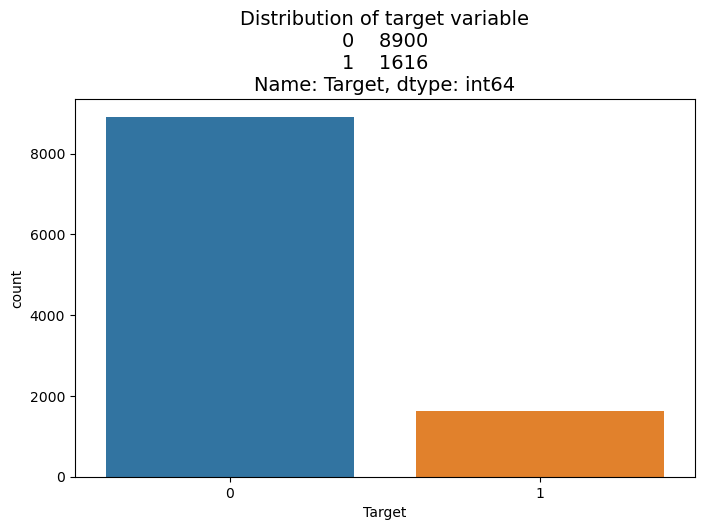

In [16]:
plt.figure(figsize = (8, 5), dpi = 100)
sns.countplot(df['Target'])
plt.title(f"Distribution of target variable\n{df['Target'].value_counts()}", fontsize = 14)
plt.show()

In [17]:
import datetime as dt

df['MMM-YY'] = pd.to_datetime(df['MMM-YY']) 
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])

test['MMM-YY'] = pd.to_datetime(test['MMM-YY']) 
test['Dateofjoining'] = pd.to_datetime(test['Dateofjoining'])

### Creating a new feature  experience in the dataset.

In [18]:
df['experience'] = df['MMM-YY'] - df['Dateofjoining']

test['experience'] = test['MMM-YY'] - test['Dateofjoining']

In [22]:
# df['experience'] = df['experience'].astype(str)
# test['experience'] = test['experience'].astype(str)

df['experience'] = df['experience'].str.replace(" days", "")
test['experience'] = test['experience'].str.replace(" days", "")

In [23]:
df

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,experience
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0,8
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0,39
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,68
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0,-6
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19092,2016-02-01,2787,28,Female,C20,Master,69498,2015-07-21,NaN,1,1,250000,2,0,195
19093,2016-03-01,2787,28,Female,C20,Master,69498,2015-07-21,NaN,1,1,319740,2,0,224
19094,2016-04-01,2787,28,Female,C20,Master,69498,2015-07-21,NaN,1,1,0,1,0,255
19095,2016-05-01,2787,28,Female,C20,Master,69498,2015-07-21,NaN,1,1,0,1,0,285


In [24]:
df['experience'] = df['experience'].astype('int64')
test['experience'] = test['experience'].astype('int64')

In [25]:
# Making dummy variable
df = pd.get_dummies(df, columns=['Gender', 'City', 'Education_Level'])
test = pd.get_dummies(test, columns=['Gender', 'City', 'Education_Level'])

In [26]:
df = df.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [28]:
X = df.drop(columns = ['Target'], axis = 1)
y = df['Target']

In [31]:
X

,MMM-YY,Emp_ID,Age,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating,experience,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,2016-01-01,1,28,57387,2015-12-24,1,1,2381060,2,8,...,0,0,0,0,0,0,0,0,0,1
1,2016-02-01,1,28,57387,2015-12-24,1,1,-665480,2,39,...,0,0,0,0,0,0,0,0,0,1
2,2016-03-01,1,28,57387,2015-12-24,1,1,0,2,68,...,0,0,0,0,0,0,0,0,0,1
5,2016-12-01,4,43,65603,2016-12-07,2,2,0,1,-6,...,0,0,0,0,0,0,0,0,0,1
6,2017-01-01,4,43,65603,2016-12-07,2,2,0,1,25,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19092,2016-02-01,2787,28,69498,2015-07-21,1,1,250000,2,195,...,0,0,0,0,0,0,0,0,0,1
19093,2016-03-01,2787,28,69498,2015-07-21,1,1,319740,2,224,...,0,0,0,0,0,0,0,0,0,1
19094,2016-04-01,2787,28,69498,2015-07-21,1,1,0,1,255,...,0,0,0,0,0,0,0,0,0,1
19095,2016-05-01,2787,28,69498,2015-07-21,1,1,0,1,285,...,0,0,0,0,0,0,0,0,0,1


In [30]:
test

,Emp_ID,MMM-YY,Age,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating,experience,...,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_Bachelor,Education_Level_College,Education_Level_Master
0,394,2017-12-01,34,97722,2011-06-06,2,4,2701750,3,2370,...,0,0,0,0,0,0,0,0,0,1
1,173,2017-12-01,39,56174,2011-06-13,1,3,706010,3,2363,...,0,0,0,0,0,0,0,0,1,0
2,1090,2017-12-01,39,96750,2011-06-27,2,4,1518520,2,2349,...,0,0,0,0,0,0,0,0,1,0
3,840,2017-12-01,40,88813,2011-07-11,1,4,1151820,2,2335,...,0,0,0,0,0,1,0,0,1,0
4,308,2017-12-01,32,188418,2011-08-15,2,5,3772910,2,2300,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2134,2017-12-01,40,116006,2010-10-30,2,5,725770,1,2589,...,0,0,0,0,0,0,0,0,1,0
737,2255,2017-12-01,40,133489,2010-11-06,3,4,1864400,3,2582,...,0,0,0,0,0,0,0,0,1,0
738,448,2017-12-01,37,65389,2011-04-04,2,4,5058470,3,2433,...,0,0,0,0,0,0,0,1,0,0
739,1644,2017-12-01,48,105513,2011-04-28,2,4,912620,1,2409,...,0,0,0,0,0,0,1,1,0,0


In [32]:
X.drop(['Dateofjoining', 'MMM-YY'], axis = 1, inplace = True)
test.drop(['Dateofjoining', 'MMM-YY'], axis = 1, inplace = True)

In [33]:
# Scaling the model
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
test = scaler.transform(test)

In [34]:
# spliting the data for model building
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [35]:
from sklearn.metrics import f1_score

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
score_train= f1_score(y_train,y_pred)


y_pred1 = model.predict(X_valid)
score_test= f1_score(y_valid,y_pred1)


print('Train F1 score:',score_train)
print('Valid F1 score:',score_test)

Train F1 score: 0.37985023825731795
Valid F1 score: 0.3934890304317056


In [38]:
predictions = model.predict(test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [42]:
sample['Target'] = predictions

In [43]:
sample['Target'].value_counts()

In [44]:
sample.to_csv('logistic_regression1.csv', index=False)